In [3]:
!pip install pandas seaborn matplotlib scikit-learn

  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [12]:
# Read the CSV file into a DataFrame
df = pd.read_csv("Time-Wasters on Social Media.csv")
df = df.drop(columns=["UserID", "OS", "Video ID", "Debt", "Owns Property", "Importance Score", "ConnectionType", "Demographics", ])

# Print the DataFrame
print("Features: ", df.columns.tolist())
print("Number of Features: ", len(df.columns))
print("Data types of each column:")
print(df.dtypes)

Features:  ['Age', 'Gender', 'Location', 'Income', 'Profession', 'Platform', 'Total Time Spent', 'Number of Sessions', 'Video Category', 'Video Length', 'Engagement', 'Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate', 'Frequency', 'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'Watch Time', 'Self Control', 'Addiction Level', 'CurrentActivity']
Number of Features:  23
Data types of each column:
Age                          int64
Gender                      object
Location                    object
Income                       int64
Profession                  object
Platform                    object
Total Time Spent             int64
Number of Sessions           int64
Video Category              object
Video Length                 int64
Engagement                   int64
Time Spent On Video          int64
Number of Videos Watched     int64
Scroll Rate                  int64
Frequency                   object
ProductivityLoss             int64
Satisfact

In [15]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to non-numeric columns
label_encoders = {}
for column in non_numeric_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

print("Data types after encoder:")
print(df.dtypes)

Data types after encoder:
Age                         int64
Gender                      int64
Location                    int64
Income                      int64
Profession                  int64
Platform                    int64
Total Time Spent            int64
Number of Sessions          int64
Video Category              int64
Video Length                int64
Engagement                  int64
Time Spent On Video         int64
Number of Videos Watched    int64
Scroll Rate                 int64
Frequency                   int64
ProductivityLoss            int64
Satisfaction                int64
Watch Reason                int64
DeviceType                  int64
Watch Time                  int64
Self Control                int64
Addiction Level             int64
CurrentActivity             int64
dtype: object


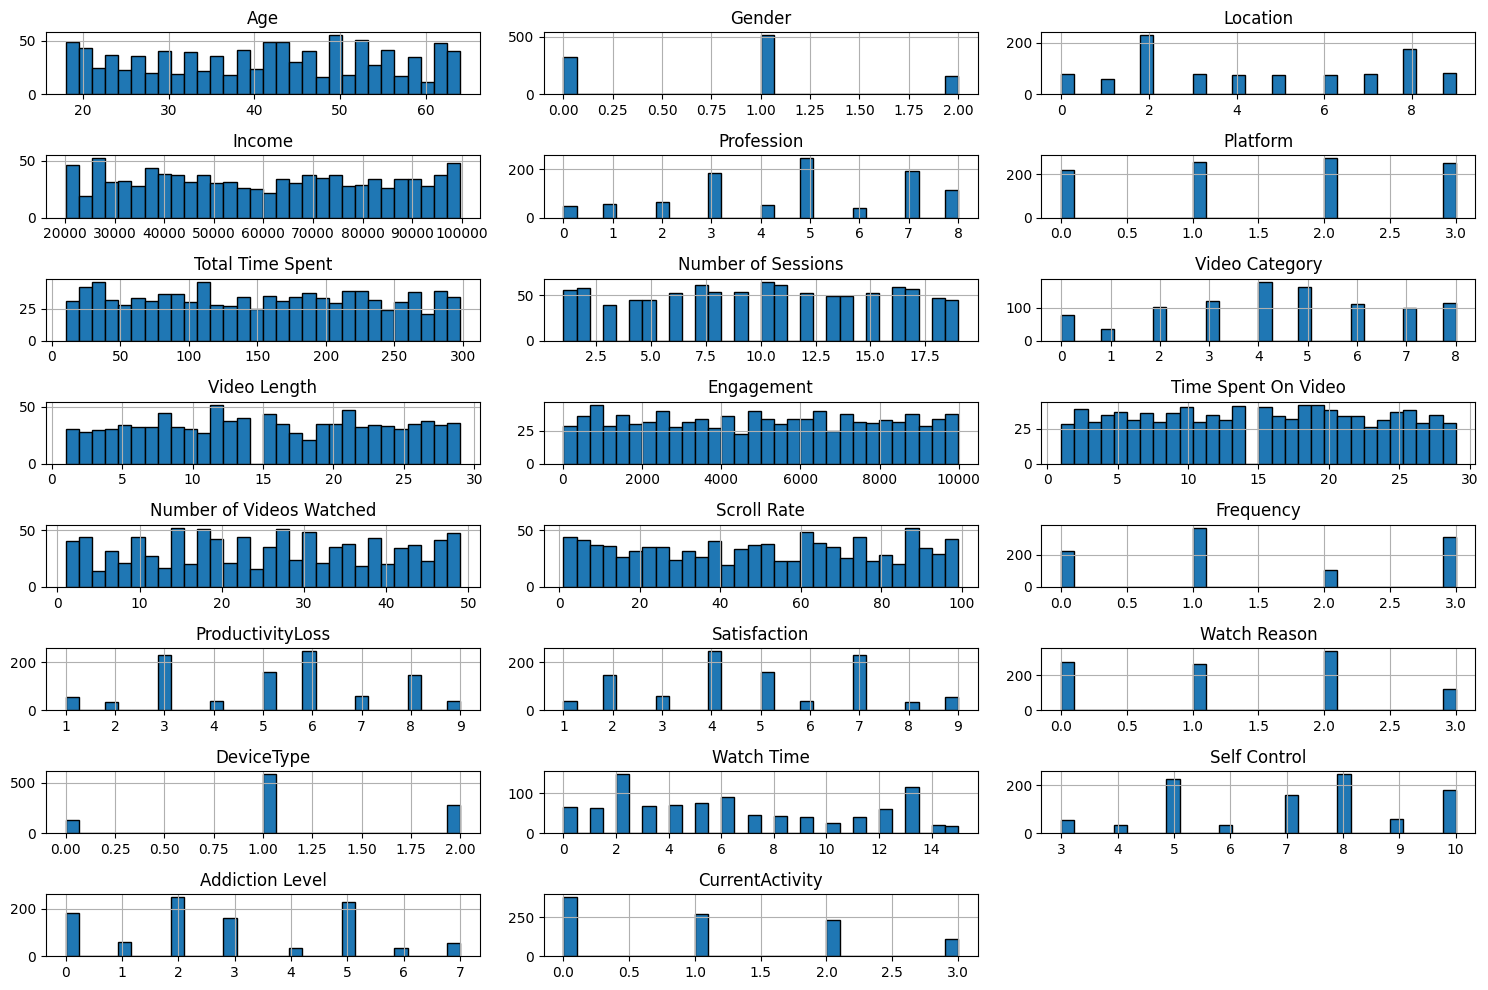

In [14]:
# Plot the distribution for each column
df.hist(bins=30, figsize=(15, 10), layout=(len(df.columns) // 3 + 1, 3), edgecolor='black')
plt.tight_layout()
plt.show()

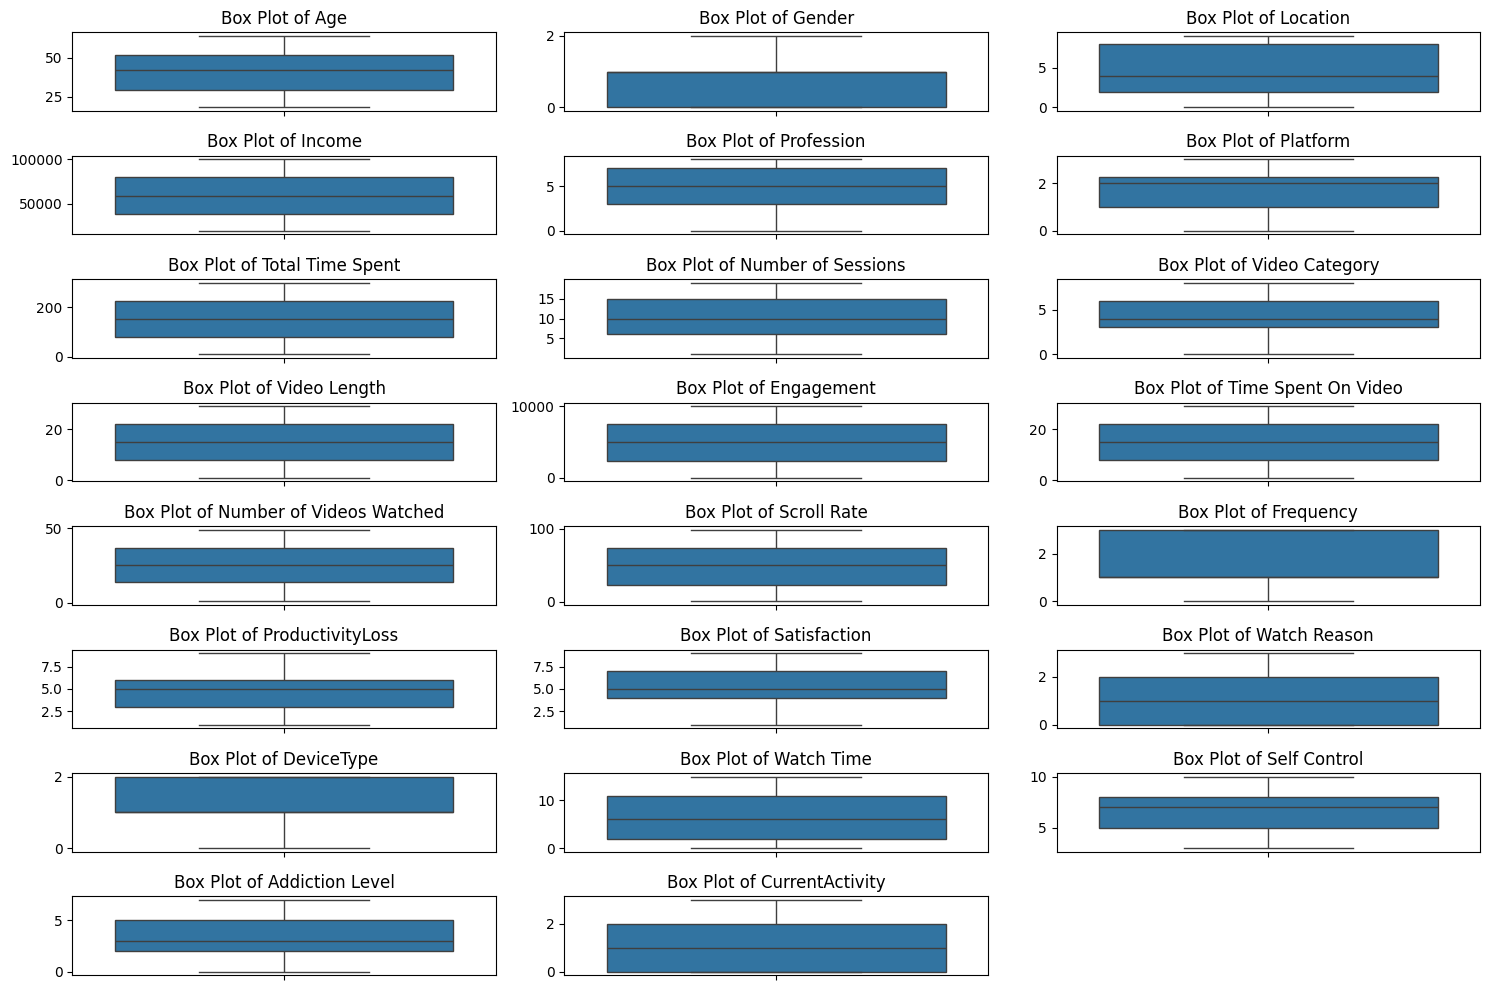

In [21]:
# Function to check for outliers
def has_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).any()

# Plot the box plot for each column and check for outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns) // 3 + 1, 3, i)
    sns.boxplot(y=df[column])
    plt.ylabel('')
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()
    if has_outliers(df[column]):
        print(f"{column} has outliers")
    # else:
    #     print(f"{column} does not have outliers")

plt.show()

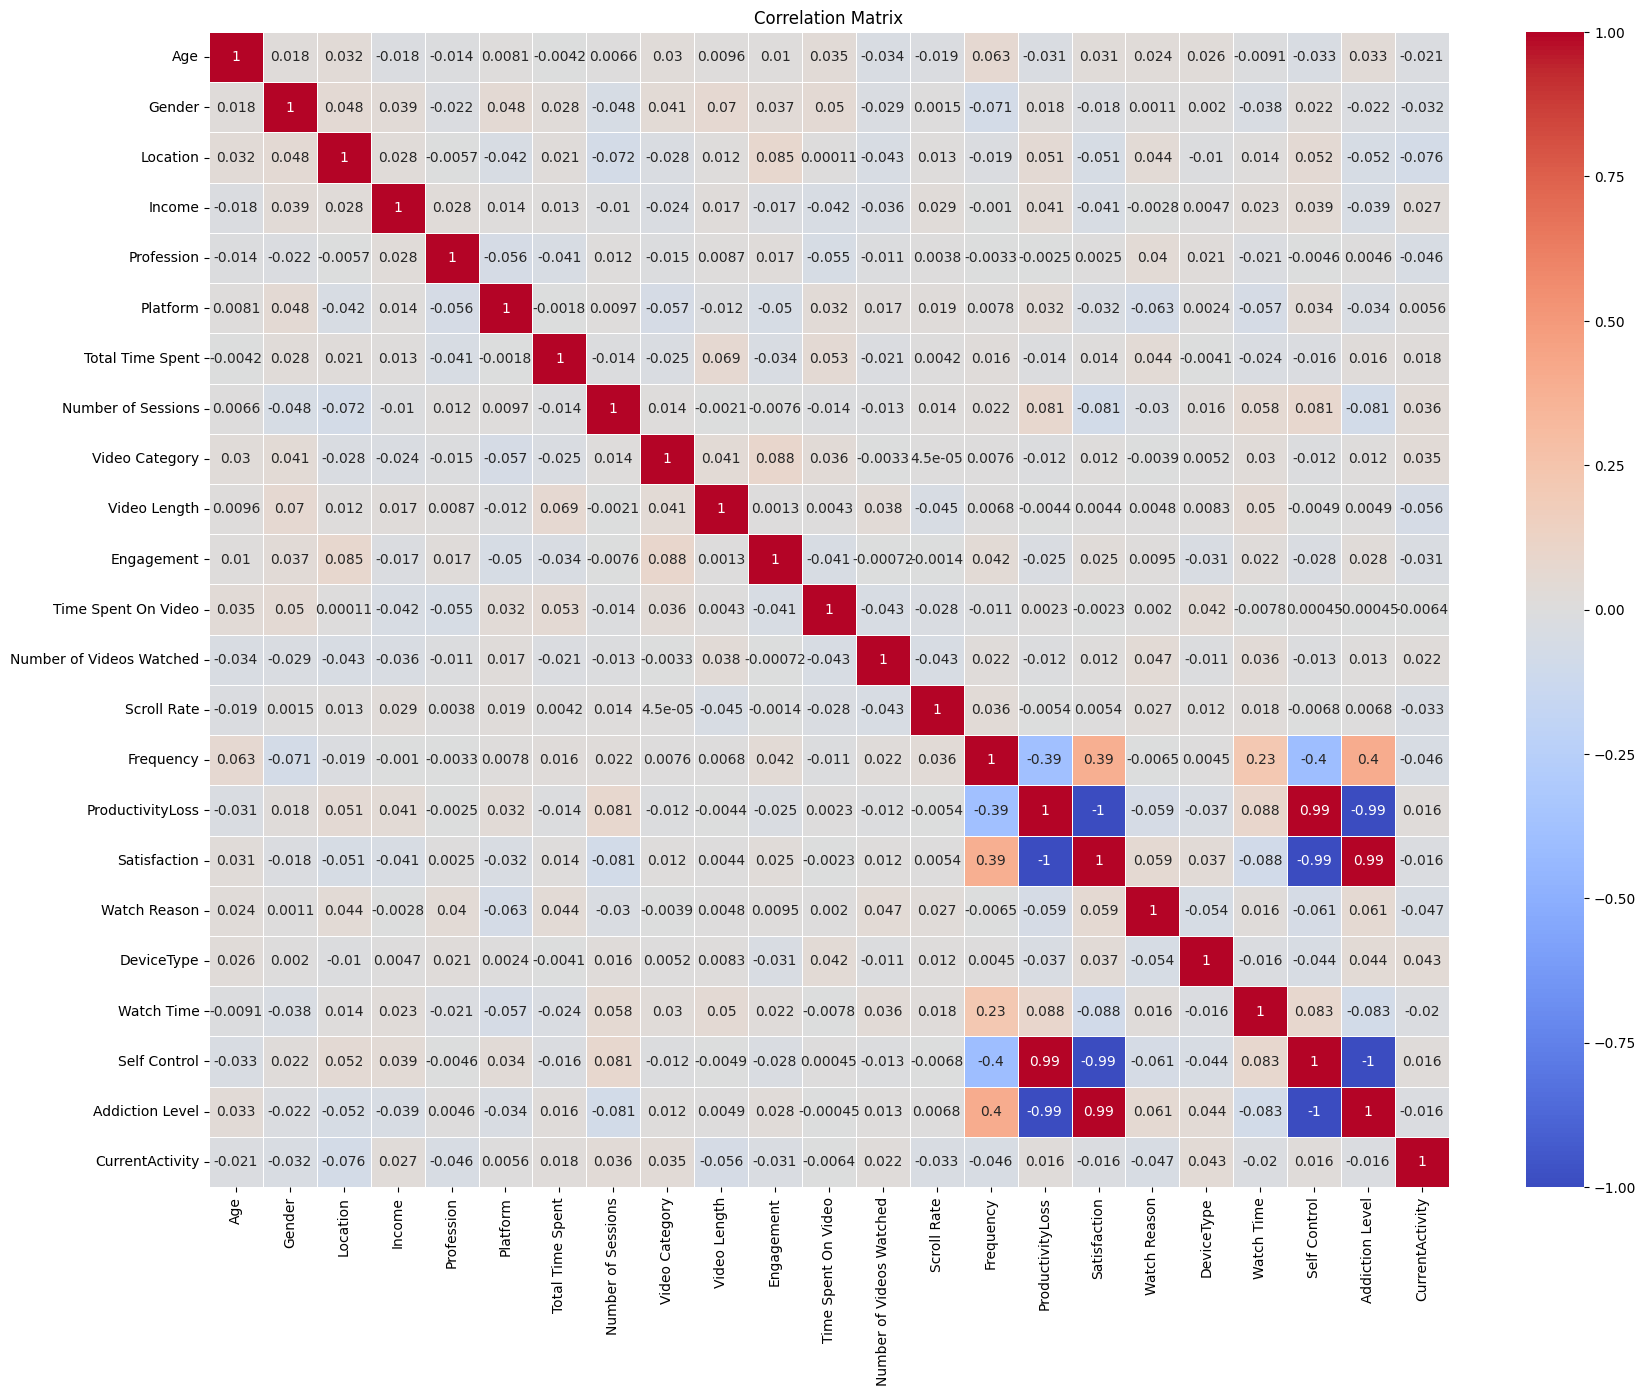

In [24]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()